In [92]:
import matplotlib.pyplot as plt
import numpy as np
from math import pow, cos, sin, sqrt, pi, sqrt
import scipy as sp
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import time

In [93]:
Nx=21
Ny=21
a=1
V0=-10
Vn=0
t=0

In [94]:
kx=np.zeros(Nx)
ky=np.zeros(Ny)
        
for rx in range(0,Nx):
    kx[rx] = -pi/a + 2*pi*(rx)/(a*(Nx-1))
for ry in range(0,Ny):
    ky[ry] = -pi/a + 2*pi*(ry)/(a*(Ny-1))

In [95]:
kx
#se nota que kx[10]=0

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
        3.14159265])

In [96]:
ky

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
        3.14159265])

In [97]:
#se construye la matriz que se usará para relacionar los indices de V(i,j) con sus valores dados
p=np.zeros(Nx*Ny)
b=0
for rx in range(0,Nx):
    for ry in range(0,Ny):
        p[b]=b
        b=b+1
q = np.zeros((Nx,Ny))
c=0
for nx in range(0,Nx):
    for ny in range(0,Ny):
        q[nx][ny] = p[c]
        c=c+1

In [98]:
q
#se nota que q[10][10] = 220, es decir que el valor i(10,10)=220, y como kx[10]=0, entonces i=220 otorga el vector momento nulo

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.],
       [ 21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
         32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.],
       [ 42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
         53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.],
       [ 63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
         74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.],
       [ 84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
         95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.],
       [105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
        116., 117., 118., 119., 120., 121., 122., 123., 124., 125.],
       [126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
        137., 138., 139., 140., 141., 142., 143., 144., 145., 146.],

In [99]:
#se define la matriz i y j de dimension NxN=N**2
def i(rx,ry):
    return q[rx,ry]
def j(rx,ry):
    return q[rx,ry]

In [100]:
i(0,0)
#indica el item ubicado en la posición (0,0) en la matriz q

0.0

In [101]:
j(0,0)
#indica el item ubicado en la posición (0,0) en la matriz q

0.0

In [102]:
#relacionamos cada elemento de la matriz con sus indices
def find(element, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == element:
                return (i, j)

In [103]:
find(220,q)

(10, 10)

In [104]:
#mostramos la matriz N**2 X N**2
def V(i,j):
    k1=find(i,q)
    k2=find(j,q)
    
    kx1=kx[k1[0]]
    ky1=ky[k1[1]]
    
    kx2=kx[k2[0]]
    ky2=ky[k2[1]]
    return V0+Vn*(cos((kx1-kx2)*a)+cos((ky1-ky2)*a))

In [105]:
V(220,220)
#220 es el número en la tabla de valores de q en donde ambos componentes del vector momentum son cero
#solo en la cadena de momentos usamos kx[10] = 0, para el momento nulo usamos i=220 

-10.0

In [106]:
#se muestra la función V en forma matricial
Vm = np.zeros((Nx**2,Ny**2))
for m in range(0,Nx*Nx):
    for n in range(0,Ny*Ny):
        Vm[m][n] = V(m,n)

In [107]:
Vm
#se ve que debido a que Vn=0 y V0=-10, entonces todos los elementos
#de la matriz potencial será igual a -10

array([[-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       ...,
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.]])

In [108]:
#mostramos la función de energía cinética E
def E(i):
    k1=find(i,q)
    
    kx1=kx[k1[0]]
    ky1=ky[k1[1]]
    return -2*t*(cos(kx1*a)+cos(ky1*a))

In [109]:
E(220)
#ya que en el array de kx[10]=0, y el 112 se ubica en la posición 10,10 de la tabla de valores q

0.0

In [110]:
#se añade un factor complejo a la energía
eta = 0.1
cpj= complex(0,1)
#complex(a,b) = a+bj
#para un valor de eta mas grande, la gráfica mostrará mayor suavidad

In [111]:
#mostramos la función K, que depende de w
def K(i,j,w):
    return V(i,j)/((w-2*E(j)+cpj*eta))

In [112]:
K(220,220,1)

(-9.900990099009901+0.9900990099009901j)

In [113]:
#se da a función K en forma matricial que depende de w
U = np.zeros((Nx**2, Ny**2), dtype=complex)
def Km(w):
    for nx in range(0,Nx**2):
        for ny in range(0,Ny**2):
            U[nx][ny] = K(nx,ny,w)/(Nx*Ny) #cambio sugerido
    return U

In [114]:
#se define la matriz identidad
I = np.zeros((Nx**2,Ny**2), dtype=complex)
for nx in range(0,Nx**2):
    I[nx][nx] = 1.0

In [115]:
I

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

In [116]:
#se define la matriz T
def T(w):
    K2 = (I-Km(w))
    K3 = np.linalg.inv(K2) #matriz inversa
    K4 = np.dot(K3, Vm) #producto matricial
    return K4[220][220].imag #solo se estan tomando los valores donde ambos momentos son iguales a cero, se usa la parte imaginaria

In [117]:
x = np.linspace(-15,5,80)

In [118]:
# se añade un algoritmo para medir el tiempo de compilacion
st = time.time()

#algoritmo para generar los valores de la cadena para T(w)

R =np.zeros(len(x))
for z in range(len(x)):
    R[z] = T(x[z])
    


# espera por 3 segundos
time.sleep(3)


# se obtiene el tiempo final
et = time.time()

# se tiene el tiempo de ejecución
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 2709.365808725357 seconds


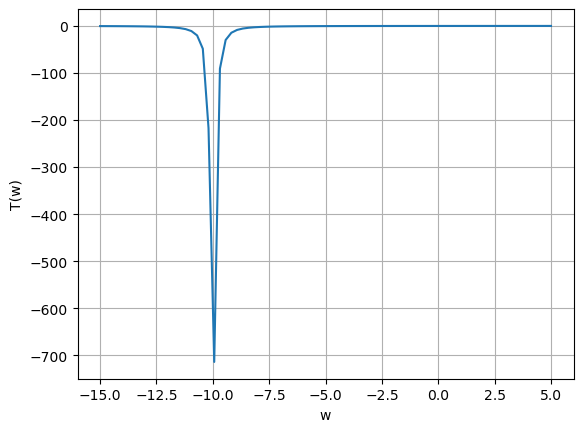

In [119]:
plt.plot(x, R)
plt.grid()
plt.xlabel('w')
plt.ylabel('T(w)')
plt.show()